# Analisis Life Expectancy
## Kelompok 1
|Nama|NIM|
|:-:|:-:|
|Muhammad Zamroni|16721038|
|Billy Christianto|16721048|
|Afifah Anugrayni|16721233|
|Carlios Eryan|16721253|


## Dataset yang digunakan:
World Happiness [(sumber)](https://www.kaggle.com/unsdsn/world-happiness)
> Format: CSV 
> 
> Ukuran file: 16.6 kB 
> 
> Dimensi: 158 baris x 12 kolom
>
> Deskripsi:

## Semua data ini kami dapatkan dari website Kaggle
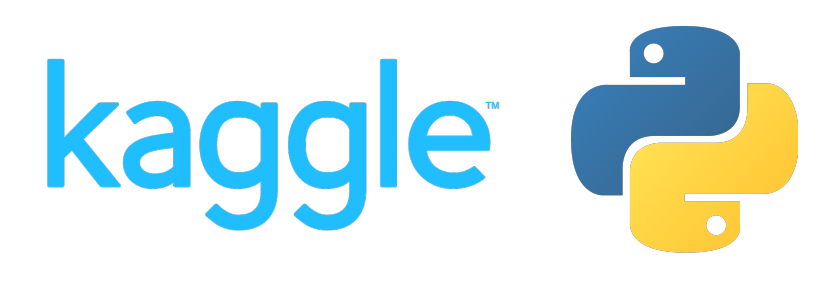

## Data yang akan dianalisis dan visualisasi:
1. 
2. 



![](Purple.png)

# A. Pendahuluan

****

## Import library yang akan digunakan

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns
from matplotlib import cm

![](Blue.png)

## Membaca Data

In [79]:
dfL = pd.read_csv("./life_expectancy.csv")

![](Purple.png)

# B. Deskripsi Data dan File
****

## Deskripsi File

Life Expectancy [(sumber)](https://www.kaggle.com/kumarajarshi/life-expectancy-who)
> Format: CSV 
> 
> Ukuran file: 333 kB 
> 
> Dimensi: 2938 baris x 22 kolom





![](Blue.png)

## Dimensi Data

In [80]:
print(f"Dimensi data life expectancy: {dfL.shape[0]} baris x {dfL.shape[1]} kolom")


Dimensi data life expectancy: 2938 baris x 22 kolom


![](Purple.png)

# C. Karakteristik Data
****

## Nama Kolom:

In [81]:
dfL.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

![](Blue.png)

## Rename Kolom

In [82]:
dfL.rename(columns = {"BMI " :"BMI", 
                      "Life expectancy ": "Life_expectancy",
                      "Adult Mortality":"Adult_mortality",
                      "infant deaths":"Infant_deaths",
                      "percentage expenditure":"Percentage_expenditure",
                      "Hepatitis B":"HepatitisB",
                      "Measles ":"Measles",
                      "under-five deaths ": "Under_five_deaths",
                      "Total expenditure":"Total_expenditure",
                      "Diphtheria ": "Diphtheria",
                      "thinness  1-19 years":"Thinness_1-19_years",
                      "thinness 5-9 years":"Thinness_5-9_years",
                      "HIV/AIDS":"HIV/AIDS",
                      "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [83]:
dfL.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

![](Blue.png)

## Tipe data

In [84]:
dfL.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_mortality                    float64
Infant_deaths                        int64
Alcohol                            float64
Percentage_expenditure             float64
HepatitisB                         float64
Measles                              int64
BMI                                float64
Under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness_1-19_years                float64
Thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

#### Penjelasan Kolom:
1. Country: Negara
2. Year: Tahun
3. Status: Negara berkembang atau maju (Developing/Developed)
4. Life_expectancy: Harapan hidup (dalam tahun)
5. Adult_Mortality: Kematian pada umur dewasa untuk kedua jenis kelamin (Probabilitas meninggal pada umur antara 15 sampai 60 per 1000 populasi)
6. Infant_deaths: Jumlah kematian bayi per 1000 populasi
7. Alcohol: Konsumsi alkohol per kapita (dalam liter alkohol murni)
8. Percentage_expenditure: Biaya pengeluaran dalam bidang kesehatan (dalam persentase dari bruto produk domestik per kapita)
9. Hepatitis B: Imunisasi Hepatitis B untuk anak umur 1 tahun (dalam persentase)
10. Measles: Jumlah laporan kasus campak per 1000 populasi
11. Under_five_deaths: Jumlah kematian di bawah 5 tahun per 1000 populasi
12. Polio: Imunisasi untuk anak umur 1 tahun (dalam persentase)
13. Total_expenditure: Pengeluaran total dalam bidang kesehatan dari total pengeluaran total pemerintah (dalam persentase)
14. Diphtheria: Imunisasi Diphteria tetanus toxoid and pertussis (DTP3) untuk anak umur 1 tahun (dalam persentase)
15. HIV/AIDS: Kematian per 1000 kelahiran dengan HIV/AIDS (0-4 tahun)
16. GDP: Gross Domestic per capita (dalam USD)
17. Population: Jumlah populasi sebuah negara
18. thinness_1-19 years: Tersebarnya kekurusan anak anak dan remaja umur 10 hingga 19 (dalam persentase)
19. thinness_5-9_years: Tersebarnya kekurusan anak anak umur 5 hingga 9 (dalam persentase)
20. Income_composition of resources: Indeks Pembangunan Manusia dalam aspek komposisi pendapatan dari sumber daya (berkisar dari 0 hingga 1)
21. Schooling: Jumlah tahun sekolah (dalam tahun)

#### Jenis Data:
- Categorical-Nominal: Country
- Categorical-Binary: Status
- Quantitative-Discrete: Year, Adult Mortality, infant deaths, Hepatitis B, Measles, under-five deaths, Polio, Diphtheria, Population
- Quantitative-Continues: Life expectancy, Alcohol, percentage expenditure, BMI, total expenditure, HIV/AIDS, GDP, thinness 1-19 years, thinness 5-9 years, Income composition of resources"

In [85]:
dfW.dtypes

Country                         object
Region                          object
Happiness_rank                   int64
Happiness_score                float64
Standard_error                 float64
Economy(GDP_per_capita)        float64
Family                         float64
Health(Life_expectancy)        float64
Freedom                        float64
Trust(Goverment_corruption)    float64
Generosity                     float64
Dystopia_residual              float64
dtype: object

#### Penjelasan Kolom:
1. Country: Nama Negara
2. Region: Daerah letak sebuah negara
3. Happiness Rank: Ranking sebuah negara berdasarkan tingkat kebahagiaan
4. Standard Error: Kesalahan standar
5. Economy: TBC

#### Jenis Data:
- TBC 
- 

![](Blue.png)

## Karakteristik Data

In [86]:
# TBC

![](Purple.png)

# D. Data Cleaning
****

### Jumlah data yang kosong untuk tiap kolom data life expectancy

In [87]:
print("\033[1m{:35}{:20}{:15}{:<15}\033[0m".format("Nama Kolom", "Jumlah Data Kosong", "Jumlah Data", "Persentase Kosong"))
for i in range(len(dfL.columns)):
    persentase = dfL[dfL.columns[i]].isna().sum()/len(dfL[dfL.columns[i]])*100
    Nama = dfL.columns[i].replace(" ", "")
    dK = dfL[dfL.columns[i]].isna().sum()
    jD = len(dfL[dfL.columns[i]])
    persentase = dK/jD*100
    print("{:<35}{:<20}{:<15}{:.2f}%".format(Nama, dK, jD, persentase))

Nama Kolom                         Jumlah Data Kosong  Jumlah Data    Persentase Kosong
Country                            0                   2938           0.00%
Year                               0                   2938           0.00%
Status                             0                   2938           0.00%
Life_expectancy                    10                  2938           0.34%
Adult_mortality                    10                  2938           0.34%
Infant_deaths                      0                   2938           0.00%
Alcohol                            194                 2938           6.60%
Percentage_expenditure             0                   2938           0.00%
HepatitisB                         553                 2938           18.82%
Measles                            0                   2938           0.00%
BMI                                34                  2938           1.16%
Under_five_deaths                  0                   2938           0.00%

#### Data ini merupakan data gabungan dari beberapa data masing-masing negara. Ada aspek yang tidak dilaporkan beberapa negara seperti vaksinasi hepatitis B, GDP, dan Populasi. Data yang kosong ini berasal dari negara yang terpencil seperti Vanuatu, Tonga, Togo, dan Carbo Verde.
#### Data yang kosong (berupa Null) ini diputuskan untuk dibiarkan karena tujuan dari analisis ini adalah membandingkan aspek apa yang berkorelasi dengan harapan hidup. Untuk negara dengan sebuah kolom yang kosong masih bisa berguna untuk dianalisis aspek lainnya. (Misal negara Argentina dengan kolom Hepatitis B nya yang kosong namun kolom lainnya tidak).

![](Blue.png)

### Menghapus Outliers (Data yang Berbeda Jauh dengan Lainnya)

#### Menggunakan Plot Kotak (Box Plot) Untuk Mencari Outliers

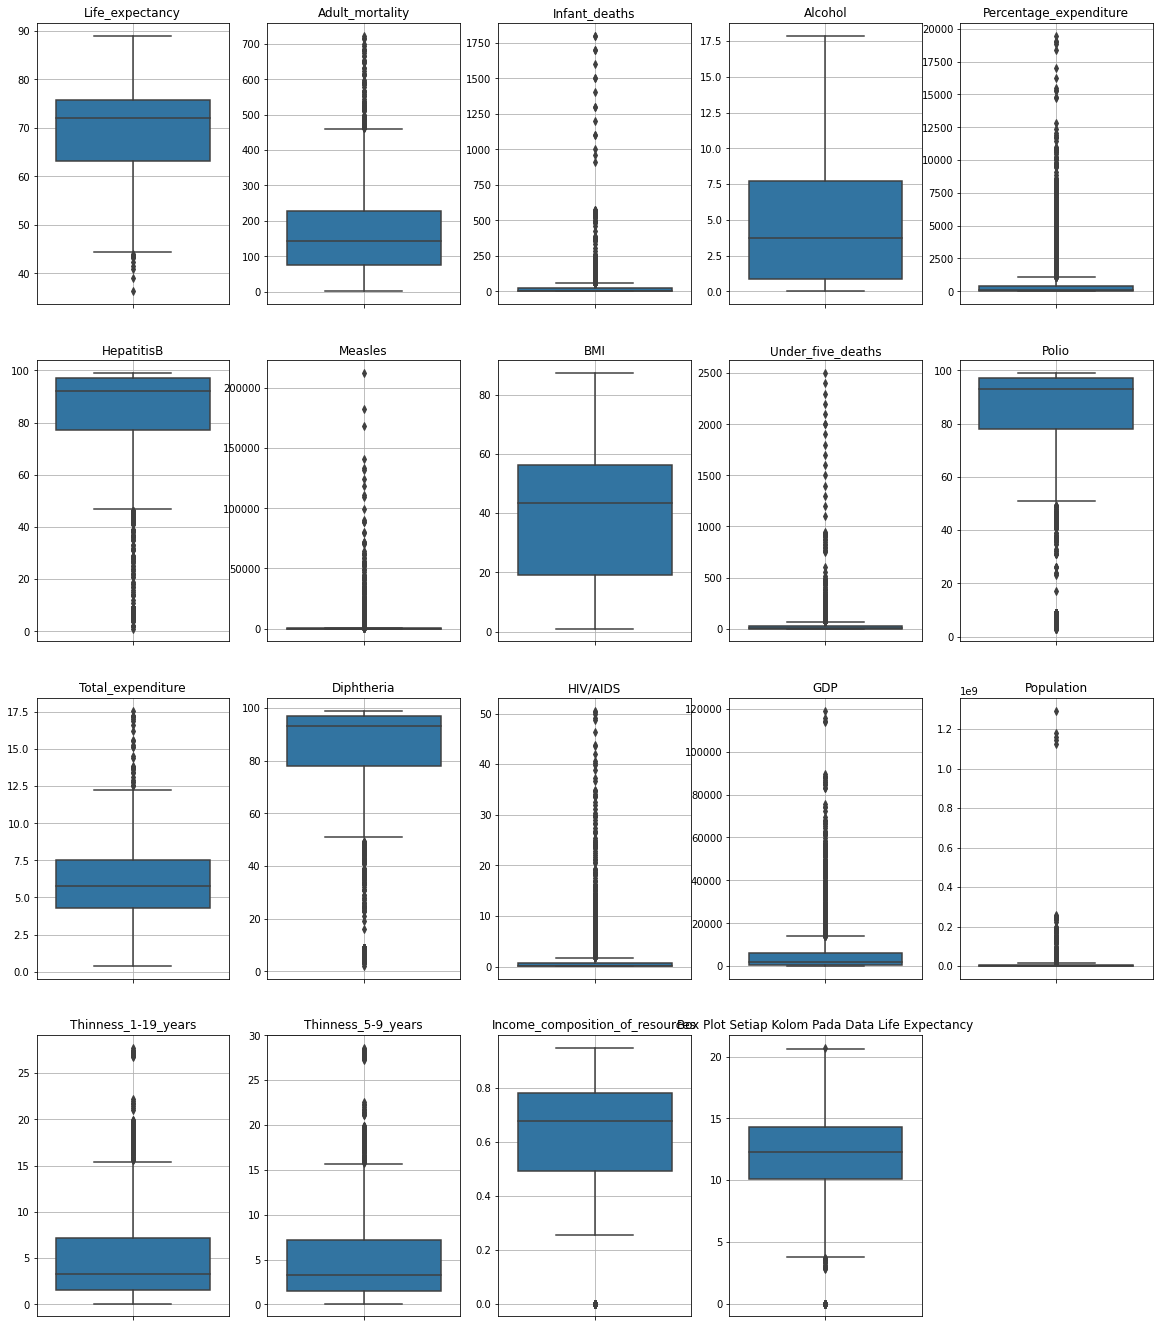

In [88]:
plt.figure(figsize=(20,30))
# numerical untuk menyimpan dataframe yang berupa integer/float
numerical = pd.DataFrame().reindex_like(dfL)

for i in range(3, len(dfL.columns)):
    if(dfL[dfL.columns[i]].dtypes == "int64" or dfL[dfL.columns[i]].dtypes == "float64"):
        numerical[dfL.columns[i]] = dfL[dfL.columns[i]]

numerical = numerical.drop(["Country", "Year", "Status"], axis=1)

for i in range (0,len(numerical.columns)):
    plt.subplot(5,5,i+1)
    sns.boxplot(y=numerical[numerical.columns[i]])
    plt.title(numerical.columns[i])
    plt.ylabel("")
    plt.grid(True)
    plt.rcParams['axes.axisbelow'] = True  
plt.show()




#### Infant_deaths, Measles, Under_five_deaths, HIV/AIDS adalah data per 1000 populasi. Keempat data ini tidak mungkin melebihi 1000, sehingga data yang melebihi 1000 harus dihapus.
#### Beberapa negara memiliki nilai GDP dan Expenditure_percentage yang melebihi 20.000%, sehingga perlu diolah lebih lanjut.
#### Nilai BMI yang melebihi 35 sudah termasuk obesitas, namun dari boxplot, terlihat bahwa lebih dari setengah data BMI melebihi 35. Kolom ini tidak valid sehingga diputuskan untuk di-delete
![](BMI.jpeg)

#### Menghapus data Infant_deaths, Measles, Under_five_deaths, HIV/AIDS yang melebihi 1000

In [89]:
dfL = dfL[dfL["Infant_deaths"] <= 1000]
dfL = dfL[dfL["Measles"] <= 1000]
dfL = dfL[dfL["Under_five_deaths"] <= 1000]

#### Menghapus Kolom BMI

In [90]:
dfL.drop(["BMI"], axis=1, inplace=True, errors="ignore")

#### Menggunakan logaritma untuk mengubah data kolom "Percentage_expenditure", "Population", dan "GDP" menjadi logaritma dari nilainya karena perbandingan ukuran box dan data outliers yang jauh

In [91]:
old = np.seterr(invalid='ignore')

dfL["log_Percentage_expenditure"] = np.log(dfL["Percentage_expenditure"])
dfL["log_Population"] = np.log(dfL["Population"])
dfL["log_GDP"] = np.log(dfL["GDP"])
dfL = dfL.replace([np.inf, -np.inf], 0)
np.seterr(**old)

C:\Users\Carlios\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

#### Dikarenakan semua data mempunyai outliers yang cukup banyak, maka akan digunakan metode winsorization yaitu dengan mengubah nilai outliers menjadi nilai persentil yang terdekat

In [92]:
dfL['winz_Life_expectancy'] = winsorize(dfL['Life_expectancy'], (0.05,0))
dfL['winz_Adult_mortality'] = winsorize(dfL['Adult_mortality'], (0,0.04))
dfL['winz_Alcohol'] = winsorize(dfL['Alcohol'], (0.0,0.01))
dfL['winz_HepatitisB'] = winsorize(dfL['HepatitisB'], (0.20,0.0))
dfL['winz_Polio'] = winsorize(dfL['Polio'], (0.20,0.0))
dfL['winz_Total_expenditure'] = winsorize(dfL['Total_expenditure'], (0.0,0.02))
dfL['winz_Diphtheria'] = winsorize(dfL['Diphtheria'], (0.11,0.0))
dfL['winz_HIV/AIDS'] = winsorize(dfL['HIV/AIDS'], (0.0,0.21))
dfL['winz_Thinness_1-19_years'] = winsorize(dfL['Thinness_1-19_years'], (0.0,0.04))
dfL['winz_Thinness_5-9_years'] = winsorize(dfL['Thinness_5-9_years'], (0.0,0.04))
dfL['winz_Income_composition_of_resources'] = winsorize(dfL['Income_composition_of_resources'], (0.05,0.0))
dfL['winz_Schooling'] = winsorize(dfL['Schooling'], (0.03,0.01))

#### Dimensi data setelah data cleaning

In [93]:
print(f"Dimensi data life expectancy sebelum data cleaning: {2938} baris x {22} kolom")
print(f"Dimensi data life expectancy setelah data cleaning: {dfL.shape[0]} baris x {dfL.shape[1]} kolom")

Dimensi data life expectancy sebelum data cleaning: 2938 baris x 22 kolom
Dimensi data life expectancy setelah data cleaning: 2413 baris x 36 kolom


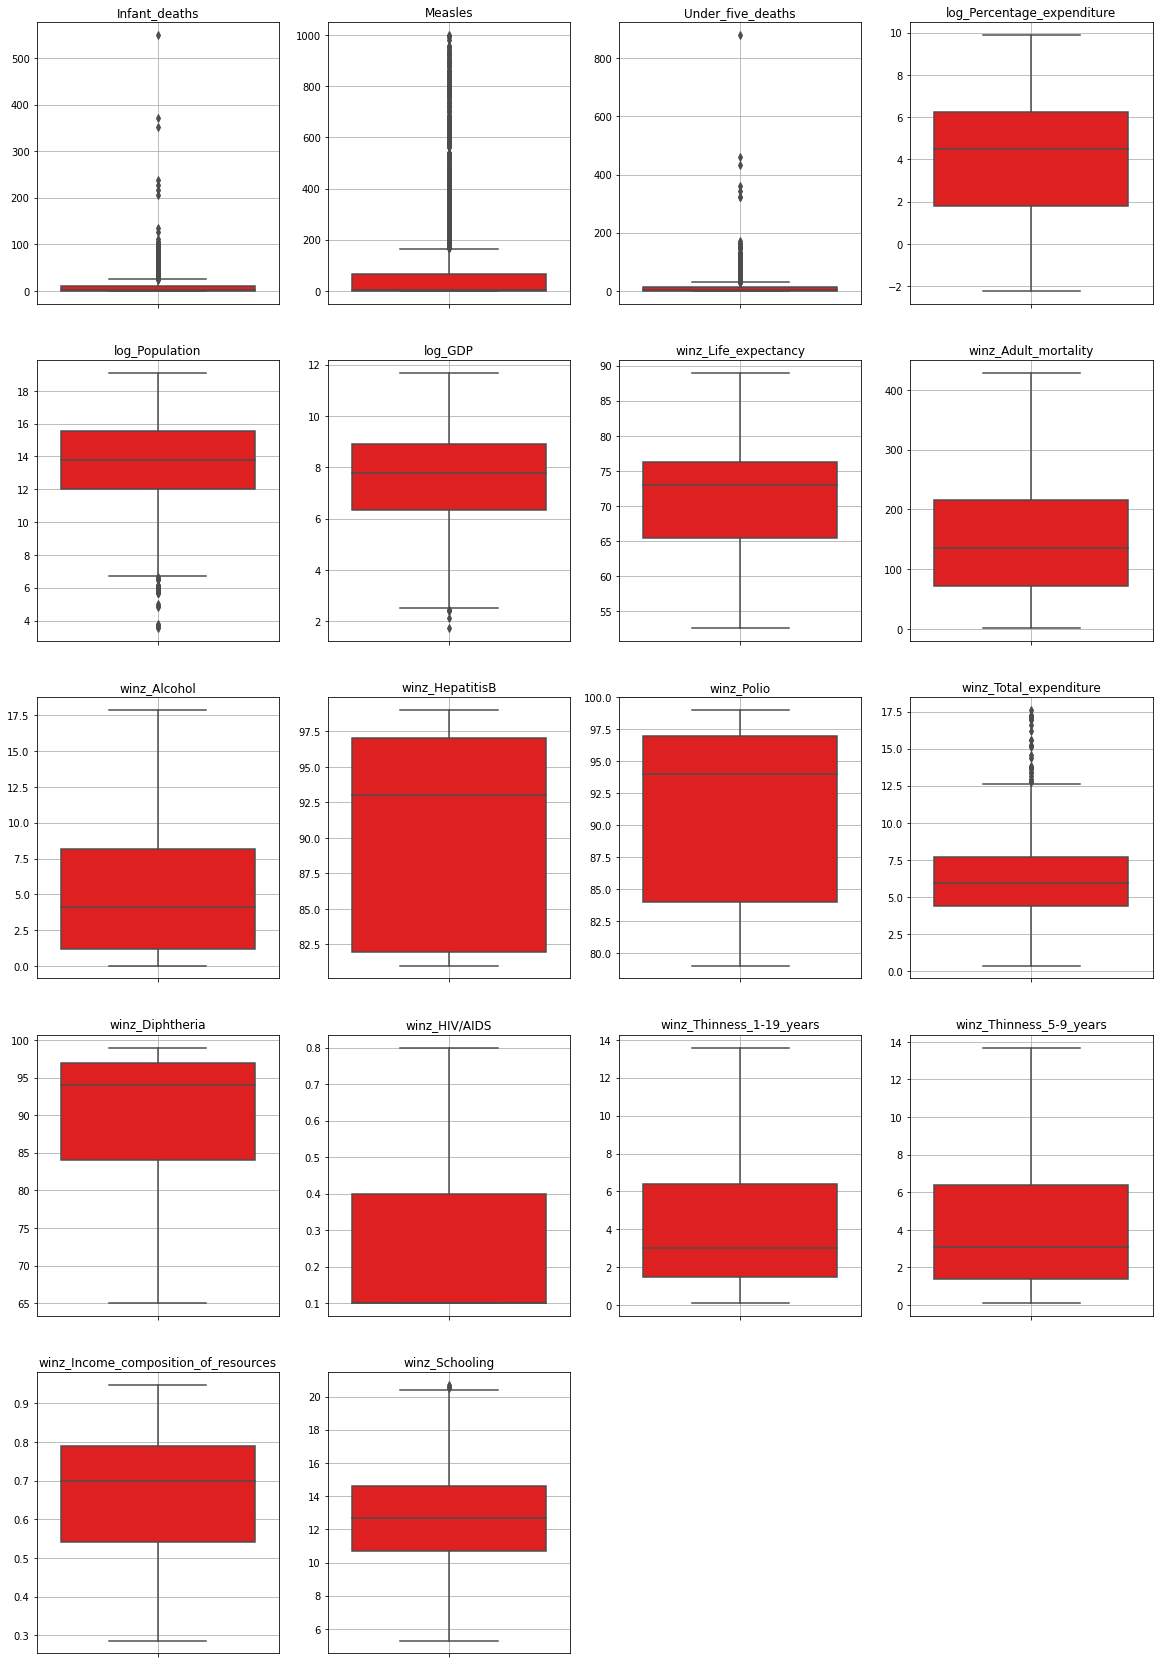

In [94]:
plt.figure(figsize=(20,30))
numerical_winsor = pd.DataFrame().reindex_like(dfL)

for i in range(3, len(dfL.columns)):
    if(dfL[dfL.columns[i]].dtypes == "int64" or dfL[dfL.columns[i]].dtypes == "float64"):
        numerical_winsor[dfL.columns[i]] = dfL[dfL.columns[i]]

numerical_winsor = numerical_winsor.drop(["Country", "Year", "Status", "Percentage_expenditure", "Population","GDP", "Life_expectancy", "Adult_mortality", "Alcohol", "HepatitisB", "Polio", "Total_expenditure", "Diphtheria", "HIV/AIDS", "Thinness_1-19_years", "Thinness_5-9_years", "Income_composition_of_resources", "Schooling", ], axis=1)
for i in range (0, len(numerical_winsor.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=numerical_winsor[numerical_winsor.columns[i]], color="red")
    plt.title(numerical_winsor.columns[i])
    plt.ylabel("")
    plt.grid(True)
    plt.rcParams['axes.axisbelow'] = True
plt.show()

In [95]:
dfL_Clean = dfL[['Year', 'Country', 'Status','winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_HepatitisB','Measles','Under_five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']]

![](Purple.png)

# E. Statistik
****

## Sampel Data


In [96]:
dfL_Clean.head(5)

,Year,Country,Status,winz_Life_expectancy,winz_Adult_mortality,Infant_deaths,winz_Alcohol,log_Percentage_expenditure,winz_HepatitisB,Measles,Under_five_deaths,winz_Polio,winz_Total_expenditure,winz_Diphtheria,winz_HIV/AIDS,log_GDP,log_Population,winz_Thinness_1-19_years,winz_Thinness_5-9_years,winz_Income_composition_of_resources,winz_Schooling
1,2014,Afghanistan,Developing,59.90,271.00,64,0.01,4.30,81.00,492,86,79.00,8.18,65.00,0.10,6.42,12.70,13.60,13.70,0.48,10.00
2,2013,Afghanistan,Developing,59.90,268.00,66,0.01,4.29,81.00,430,89,79.00,8.13,65.00,0.10,6.45,17.27,13.60,13.70,0.47,9.90
11,2004,Afghanistan,Developing,57.00,293.00,87,0.02,2.73,81.00,466,120,79.00,8.79,65.00,0.10,5.39,17.00,13.60,13.70,0.38,6.80
12,2003,Afghanistan,Developing,56.70,295.00,87,0.01,2.41,81.00,798,122,79.00,8.82,65.00,0.10,5.29,14.68,13.60,13.70,0.37,6.50
16,2015,Albania,Developing,77.80,74.00,0,4.60,5.90,99.00,0,0,99.00,6.00,99.00,0.10,8.28,10.27,1.20,1.30,0.76,14.20


![](Blue.png)

## Statistik

In [97]:
pd.set_option("max_columns", None)
pd.options.display.float_format = "{:,.2f}".format
dfL_Clean.describe()

,Year,winz_Life_expectancy,winz_Adult_mortality,Infant_deaths,winz_Alcohol,log_Percentage_expenditure,winz_HepatitisB,Measles,Under_five_deaths,winz_Polio,winz_Total_expenditure,winz_Diphtheria,winz_HIV/AIDS,log_GDP,log_Population,winz_Thinness_1-19_years,winz_Thinness_5-9_years,winz_Income_composition_of_resources,winz_Schooling
count,"2,413.00","2,403.00","2,413.00","2,413.00","2,243.00","2,413.00","2,010.00","2,413.00","2,413.00","2,394.00","2,223.00","2,394.00","2,413.00","2,052.00","1,856.00","2,413.00","2,413.00","2,299.00","2,303.00"
mean,"2,007.80",70.70,152.86,10.34,4.90,4.13,90.68,88.98,14.40,90.90,6.11,88.79,0.29,7.66,13.61,4.18,4.18,0.66,12.49
std,4.52,8.49,109.33,24.40,4.09,2.81,6.88,186.94,35.42,7.48,2.54,11.18,0.29,1.85,2.58,3.47,3.50,0.17,3.02
min,"2,000.00",52.60,1.00,0.00,0.01,-2.23,81.00,0.00,0.00,79.00,0.37,65.00,0.10,1.73,3.53,0.10,0.10,0.29,5.30
25%,"2,004.00",65.50,72.00,0.00,1.18,1.79,82.00,0.00,0.00,84.00,4.42,84.00,0.10,6.34,11.99,1.50,1.40,0.54,10.70
50%,"2,008.00",73.00,136.00,2.00,4.14,4.50,93.00,4.00,2.00,94.00,5.95,94.00,0.10,7.77,13.81,3.00,3.10,0.70,12.70
75%,"2,012.00",76.30,216.00,10.00,8.14,6.27,97.00,66.00,12.00,97.00,7.71,97.00,0.40,8.91,15.52,6.40,6.40,0.79,14.60
max,"2,015.00",89.00,429.00,549.00,17.87,9.88,99.00,999.00,879.00,99.00,17.60,99.00,0.80,11.69,19.11,13.60,13.70,0.95,20.70


**Kesimpulan**: TBC

![](Blue.png)

![](Purple.png)

# F. Visualisasi
****

## Histogram

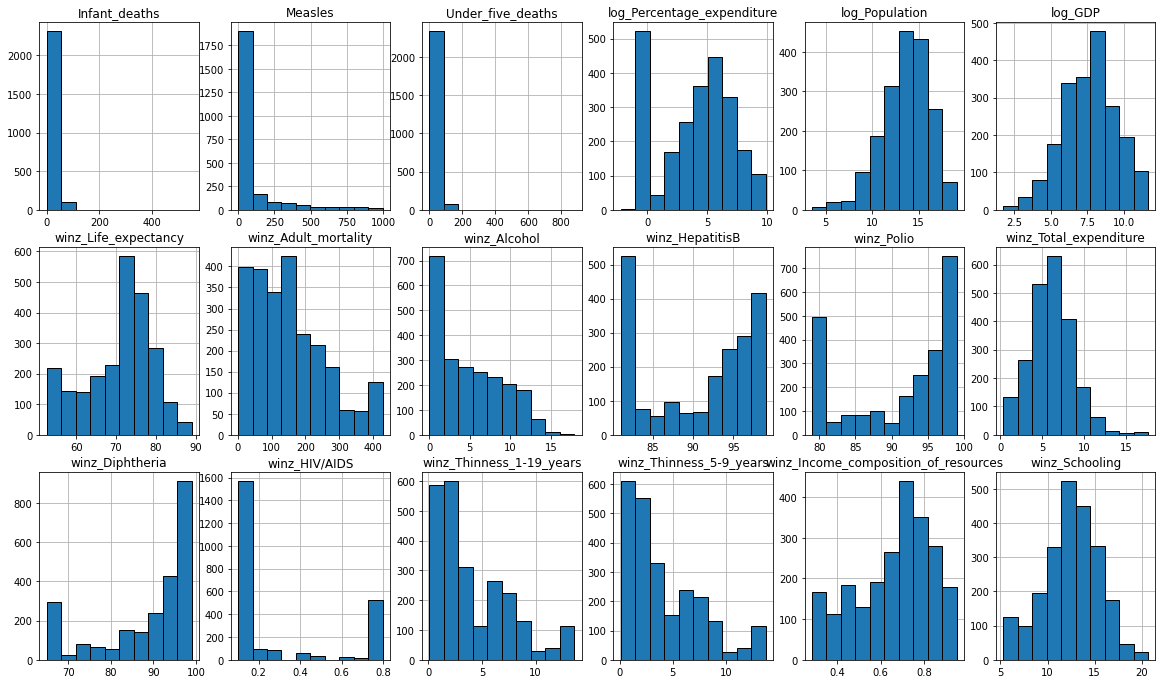

In [57]:
plt.figure(figsize=(20,20))
for i in range(len(numerical_winsor.columns)):
    plt.subplot(5,6,i+1)
    plt.hist(numerical_winsor[numerical_winsor.columns[i]], edgecolor="Black")
    plt.title(numerical_winsor.columns[i])
    plt.ylabel("")
    plt.grid(True)
    plt.rcParams['axes.axisbelow'] = True
plt.show()

![](Blue.png)

## Heatmap

<AxesSubplot:>

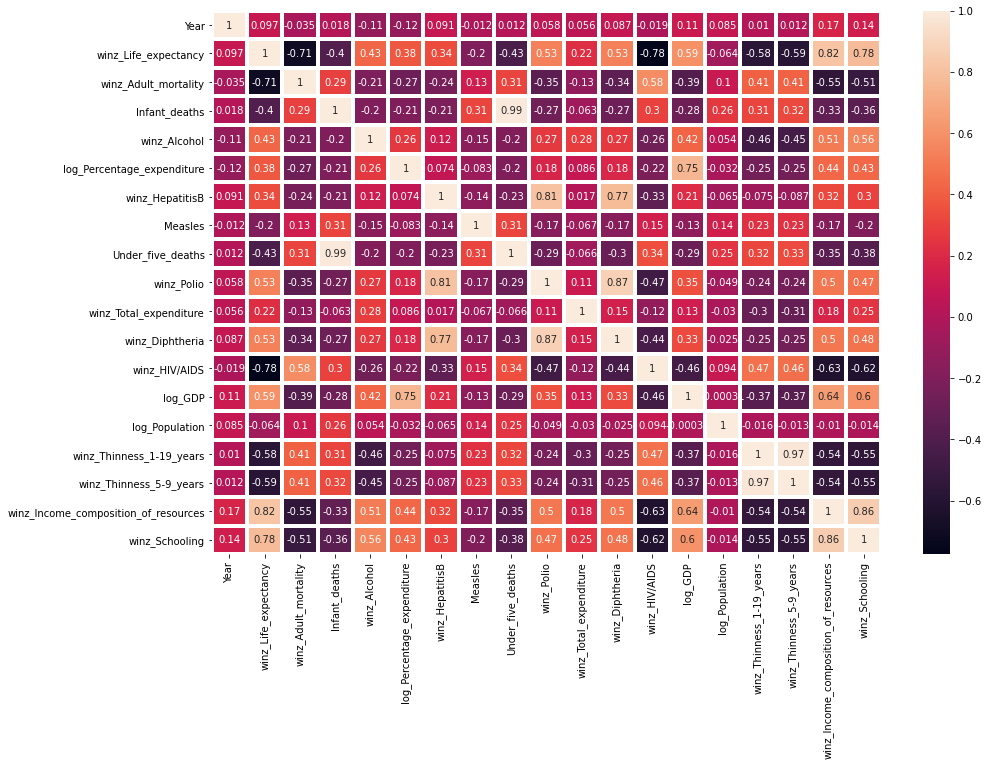

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(dfL_Clean.corr(), annot=True, linewidths = 4)

![](Blue.png)

## Grafik

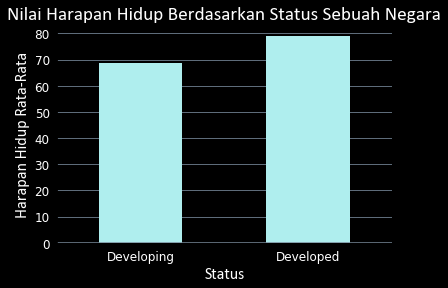

In [374]:
plt.rcParams["text.color"] = "white"
cnewfont = {"fontname":"Calibri"}
plt.rcParams["font.size"] = 16
plt.figure(facecolor="black")
ax = plt.axes()
ax.set_facecolor("black")
dfL_status = dfL_Clean.groupby("Status").mean().sort_values("winz_Life_expectancy", ascending=True)
dfL_status["winz_Life_expectancy"].plot(kind="bar", rot=0, color="paleturquoise", fontsize=12)
plt.xlabel("Status", **cnewfont, color="white")
plt.ylabel("Harapan Hidup Rata-Rata", **cnewfont, color="white")
plt.xticks(color="white")
plt.yticks(np.arange(0,90,step=10),color="white")
plt.title("Nilai Harapan Hidup Berdasarkan Status Sebuah Negara", **cnewfont)
plt.grid(True, axis="y", color="lightslategrey", which="major")
plt.plot([-20, 20], [0,0], color="lightslategrey")
plt.show()


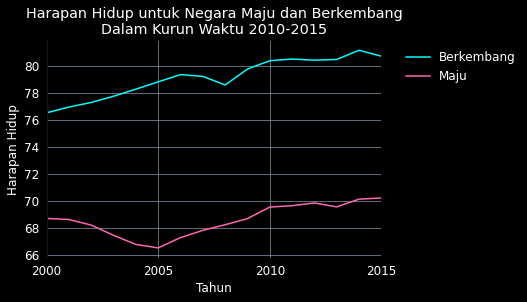

In [291]:
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = "white"
plt.figure(facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")
dfL_status_year = dfL_Clean.groupby(["Status", "Year"])["winz_Life_expectancy"].mean()
developed = dfL_status_year["Developed"]
developing = dfL_status_year["Developing"]
developed.plot(label="Berkembang", color="aqua")
developing.plot(label="Maju", color="hotpink")

legend = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('black')
plt.xticks( np.arange(2000,2016, step=5), color="white")
plt.yticks( color="white")
ax = plt.gca()
ax.set_xlim(2000,2015)
plt.xlabel("Tahun", color="white")
plt.ylabel("Harapan Hidup", color="white")

plt.title("Harapan Hidup untuk Negara Maju dan Berkembang\nDalam Kurun Waktu 2010-2015")
plt.grid(True, color="lightslategrey")

![](Purple.png)

# G. Korelasi

<AxesSubplot:>

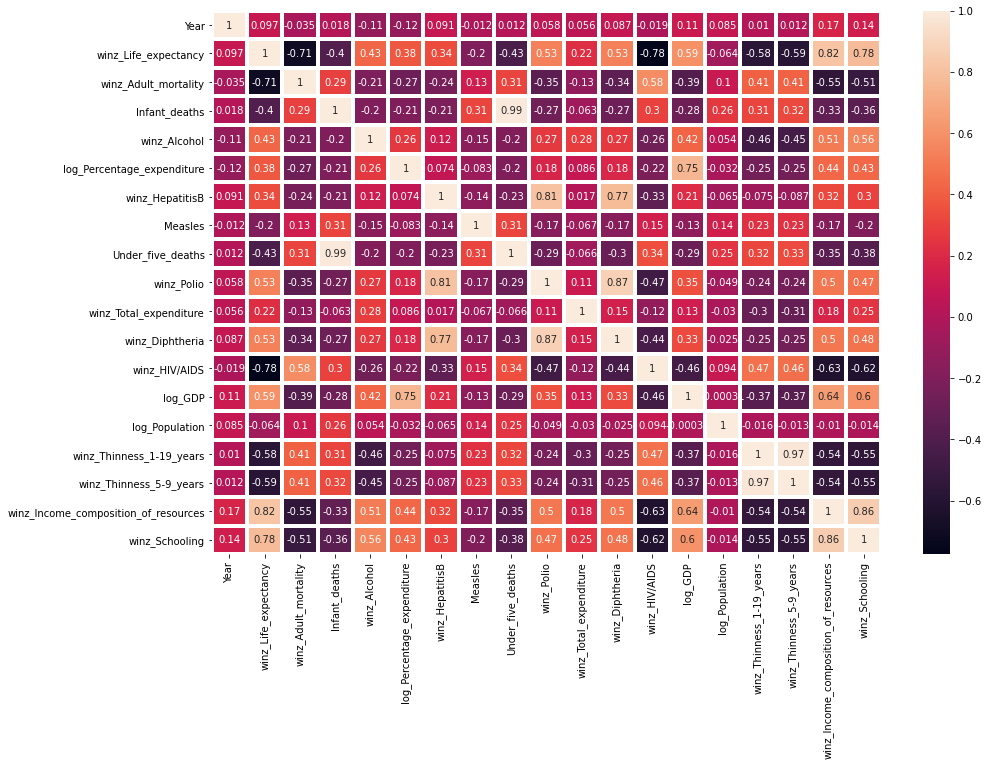

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(dfL_Clean.corr(), annot=True, linewidths = 4)